In [1]:
import numpy as np
import nltk
import string
from sklearn import datasets
from sklearn import model_selection
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB

In [2]:
data=datasets.fetch_20newsgroups()
stops=set(stopwords.words('english')) # collecting stop words
punctuations=list(string.punctuation) #and punctuation
stops.update(punctuations) #update it 
len(stops) ,data.keys()

(211, dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR']))

In [3]:
documents=data.data
categories=data.target

In [4]:
document_modified=[word_tokenize(doc) for doc in documents] #spllting the document in words my using word token_size

In [5]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(document_modified,categories,test_size=0.28,random_state=0)

In [6]:
all_words=[] #excluding stopping words in our documents
for doc in X_train:
    for word in doc:
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2:
            all_words.append(word)

In [7]:
len(all_words)

1391124

In [40]:
def freq_dict(all_words): #count the frequency of words 
    dic={}
    for i in all_words:
        if i in dic:
            dic[i]+=1
        else:
            dic[i]=1
    return dic
dic=freq_dict(all_words)

In [46]:
dic = sorted(list(dic.items()), key = lambda x : x[1], reverse = True)
dic

[("'AX", 36093),
 ("n't", 10227),
 ('Subject', 8429),
 ('Lines', 8176),
 ('Organization', 7880),
 ('would', 6629),
 ('writes', 5663),
 ('...', 5542),
 ('one', 5468),
 ('article', 4825),
 ('people', 4086),
 ('like', 3975),
 ('University', 3923),
 ('know', 3656),
 ('get', 3421),
 ('think', 3167),
 ('use', 2876),
 ('time', 2677),
 ('MAX', 2600),
 ('could', 2513),
 ('also', 2481),
 ('good', 2361),
 ('way', 2075),
 ('even', 2023),
 ('see', 2022),
 ('much', 1984),
 ('make', 1953),
 ('may', 1952),
 ('say', 1905),
 ('two', 1893),
 ('Distribution', 1840),
 ('God', 1833),
 ('new', 1807),
 ('many', 1801),
 ('Nntp-Posting-Host', 1793),
 ('said', 1763),
 ("'ve", 1759),
 ('right', 1759),
 ('want', 1722),
 ('first', 1719),
 ('work', 1690),
 ('NNTP-Posting-Host', 1677),
 ('used', 1647),
 ('need', 1609),
 ('system', 1597),
 ('something', 1578),
 ('anyone', 1523),
 ('well', 1520),
 ("'re", 1515),
 ('problem', 1486),
 ('world', 1479),
 ('going', 1429),
 ('really', 1428),
 ('still', 1381),
 ('believe', 13

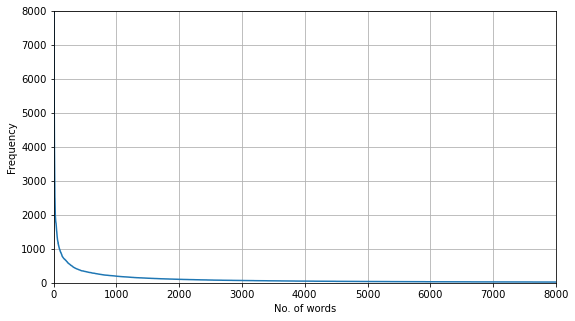

In [53]:
x = []
y = []

for i in range(len(dic)):
    x.append(i)
    y.append(dic[i][1])
    
plt.figure(figsize=(9,5))  
plt.plot(x, y)
plt.xlabel("No. of words")
plt.ylabel("Frequency")
plt.axis([0, 8000, 0, 8000])
plt.grid()
plt.show()

In [9]:
# words=np.array([i for i in dic.keys()]) #seperate works and freq
# freq=np.array([i for i in dic.values()])

In [10]:
# words=words[np.argsort(freq)][::-1] #sort in decending order
# freq=np.sort(freq)[::-1]

In [43]:
# words,freq

(array(["'AX", "n't", 'Subject', ..., 'MC=Z', "-'RSTO8-DO", 'X__3YA-+'],
       dtype='<U90'),
 array([36093, 10227,  8429, ...,     1,     1,     1]))

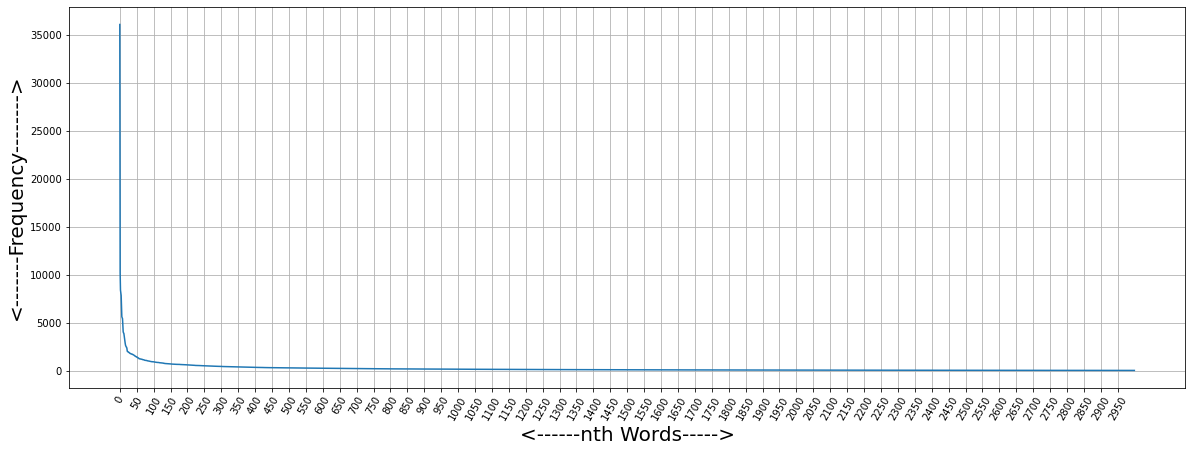

In [11]:
# #plotting graph to analse the trend of graph to predict the kth stopping features
# lower_limit=0
# upper_limit=3000
# #default value
# plt.figure(figsize=(20,7))
# difference_between_each_xtick=50  #default value. change these values to observe the graph in more depth
# plt.plot(np.arange(len(freq))[lower_limit:upper_limit],freq[lower_limit:upper_limit])
# plt.xticks(np.arange(lower_limit,upper_limit,50),rotation=60)
# plt.xlabel('<------nth Words----->',size=20)
# plt.ylabel('<-------Frequency-------->',size=20)
# plt.grid()
# plt.show()


In [59]:
features=dic[:2000]
features

[("'AX", 36093),
 ("n't", 10227),
 ('Subject', 8429),
 ('Lines', 8176),
 ('Organization', 7880),
 ('would', 6629),
 ('writes', 5663),
 ('...', 5542),
 ('one', 5468),
 ('article', 4825),
 ('people', 4086),
 ('like', 3975),
 ('University', 3923),
 ('know', 3656),
 ('get', 3421),
 ('think', 3167),
 ('use', 2876),
 ('time', 2677),
 ('MAX', 2600),
 ('could', 2513),
 ('also', 2481),
 ('good', 2361),
 ('way', 2075),
 ('even', 2023),
 ('see', 2022),
 ('much', 1984),
 ('make', 1953),
 ('may', 1952),
 ('say', 1905),
 ('two', 1893),
 ('Distribution', 1840),
 ('God', 1833),
 ('new', 1807),
 ('many', 1801),
 ('Nntp-Posting-Host', 1793),
 ('said', 1763),
 ("'ve", 1759),
 ('right', 1759),
 ('want', 1722),
 ('first', 1719),
 ('work', 1690),
 ('NNTP-Posting-Host', 1677),
 ('used', 1647),
 ('need', 1609),
 ('system', 1597),
 ('something', 1578),
 ('anyone', 1523),
 ('well', 1520),
 ("'re", 1515),
 ('problem', 1486),
 ('world', 1479),
 ('going', 1429),
 ('really', 1428),
 ('still', 1381),
 ('believe', 13

In [60]:
def modifier(x_data,feature):
    modified_2d_array=np.zeros((len(x_data),len(feature))) #created 2d matrix with 0X0 in it.
    count=0
    max_count=len(x_data)
    for i in range(len(x_data)):
        current_doc=x_data[i]
        dic={}
        for word in current_doc:
            if word in dic:
                dic[word]+=1
            else:
                dic[word]=1
        for j in range(len(features)):
            if features[j] in dic:
                modified_2d_array[i][j]=dic[features[j]]
            else:
                continue
        count+=1
        print('Progress: ',(count*100)/max_count)
    return modified_2d_array                

In [61]:
x_train_modifier=modifier(X_train,features)

Progress:  0.012275963663147557
Progress:  0.024551927326295114
Progress:  0.03682789098944267
Progress:  0.04910385465259023
Progress:  0.061379818315737786
Progress:  0.07365578197888534
Progress:  0.0859317456420329
Progress:  0.09820770930518045
Progress:  0.11048367296832802
Progress:  0.12275963663147557
Progress:  0.13503560029462314
Progress:  0.14731156395777067
Progress:  0.15958752762091824
Progress:  0.1718634912840658
Progress:  0.18413945494721334
Progress:  0.1964154186103609
Progress:  0.20869138227350847
Progress:  0.22096734593665604
Progress:  0.23324330959980358
Progress:  0.24551927326295114
Progress:  0.2577952369260987
Progress:  0.2700712005892463
Progress:  0.2823471642523938
Progress:  0.29462312791554135
Progress:  0.30689909157868894
Progress:  0.3191750552418365
Progress:  0.331451018904984
Progress:  0.3437269825681316
Progress:  0.35600294623127915
Progress:  0.3682789098944267
Progress:  0.3805548735575743
Progress:  0.3928308372207218
Progress:  0.40510

Progress:  7.770684998772404
Progress:  7.782960962435551
Progress:  7.795236926098699
Progress:  7.807512889761846
Progress:  7.819788853424994
Progress:  7.832064817088141
Progress:  7.844340780751289
Progress:  7.856616744414437
Progress:  7.868892708077584
Progress:  7.881168671740731
Progress:  7.893444635403879
Progress:  7.905720599067027
Progress:  7.917996562730174
Progress:  7.930272526393322
Progress:  7.94254849005647
Progress:  7.954824453719617
Progress:  7.967100417382764
Progress:  7.979376381045912
Progress:  7.99165234470906
Progress:  8.003928308372208
Progress:  8.016204272035354
Progress:  8.028480235698503
Progress:  8.04075619936165
Progress:  8.053032163024797
Progress:  8.065308126687945
Progress:  8.077584090351092
Progress:  8.08986005401424
Progress:  8.102136017677388
Progress:  8.114411981340535
Progress:  8.126687945003683
Progress:  8.138963908666831
Progress:  8.151239872329977
Progress:  8.163515835993126
Progress:  8.175791799656274
Progress:  8.18806

Progress:  14.252393812914313
Progress:  14.264669776577461
Progress:  14.27694574024061
Progress:  14.289221703903756
Progress:  14.301497667566904
Progress:  14.31377363123005
Progress:  14.326049594893199
Progress:  14.338325558556347
Progress:  14.350601522219494
Progress:  14.362877485882642
Progress:  14.37515344954579
Progress:  14.387429413208936
Progress:  14.399705376872085
Progress:  14.411981340535233
Progress:  14.42425730419838
Progress:  14.436533267861527
Progress:  14.448809231524674
Progress:  14.461085195187822
Progress:  14.47336115885097
Progress:  14.485637122514117
Progress:  14.497913086177265
Progress:  14.510189049840413
Progress:  14.52246501350356
Progress:  14.534740977166708
Progress:  14.547016940829856
Progress:  14.559292904493002
Progress:  14.57156886815615
Progress:  14.583844831819297
Progress:  14.596120795482445
Progress:  14.608396759145593
Progress:  14.62067272280874
Progress:  14.632948686471888
Progress:  14.645224650135036
Progress:  14.6575

Progress:  20.513135281119567
Progress:  20.525411244782717
Progress:  20.537687208445863
Progress:  20.54996317210901
Progress:  20.56223913577216
Progress:  20.574515099435306
Progress:  20.586791063098453
Progress:  20.599067026761603
Progress:  20.61134299042475
Progress:  20.623618954087895
Progress:  20.635894917751042
Progress:  20.64817088141419
Progress:  20.660446845077338
Progress:  20.672722808740485
Progress:  20.684998772403635
Progress:  20.69727473606678
Progress:  20.709550699729927
Progress:  20.721826663393077
Progress:  20.734102627056224
Progress:  20.74637859071937
Progress:  20.75865455438252
Progress:  20.770930518045667
Progress:  20.783206481708813
Progress:  20.795482445371963
Progress:  20.80775840903511
Progress:  20.820034372698256
Progress:  20.832310336361406
Progress:  20.844586300024552
Progress:  20.8568622636877
Progress:  20.86913822735085
Progress:  20.881414191013995
Progress:  20.89369015467714
Progress:  20.905966118340288
Progress:  20.91824208

Progress:  28.529339553154923
Progress:  28.54161551681807
Progress:  28.55389148048122
Progress:  28.566167444144366
Progress:  28.578443407807512
Progress:  28.59071937147066
Progress:  28.60299533513381
Progress:  28.615271298796955
Progress:  28.6275472624601
Progress:  28.63982322612325
Progress:  28.652099189786398
Progress:  28.664375153449544
Progress:  28.676651117112694
Progress:  28.68892708077584
Progress:  28.701203044438987
Progress:  28.713479008102137
Progress:  28.725754971765284
Progress:  28.73803093542843
Progress:  28.75030689909158
Progress:  28.762582862754726
Progress:  28.774858826417873
Progress:  28.787134790081023
Progress:  28.79941075374417
Progress:  28.811686717407316
Progress:  28.823962681070466
Progress:  28.836238644733612
Progress:  28.84851460839676
Progress:  28.860790572059905
Progress:  28.873066535723055
Progress:  28.8853424993862
Progress:  28.897618463049348
Progress:  28.909894426712498
Progress:  28.922170390375644
Progress:  28.9344463540

Progress:  35.858089860054015
Progress:  35.870365823717165
Progress:  35.88264178738031
Progress:  35.89491775104346
Progress:  35.9071937147066
Progress:  35.91946967836975
Progress:  35.9317456420329
Progress:  35.944021605696044
Progress:  35.956297569359194
Progress:  35.968573533022344
Progress:  35.98084949668549
Progress:  35.99312546034864
Progress:  36.00540142401179
Progress:  36.01767738767493
Progress:  36.02995335133808
Progress:  36.04222931500123
Progress:  36.05450527866437
Progress:  36.06678124232752
Progress:  36.07905720599067
Progress:  36.091333169653815
Progress:  36.103609133316965
Progress:  36.115885096980115
Progress:  36.12816106064326
Progress:  36.14043702430641
Progress:  36.15271298796956
Progress:  36.1649889516327
Progress:  36.17726491529585
Progress:  36.189540878959
Progress:  36.201816842622144
Progress:  36.214092806285294
Progress:  36.226368769948444
Progress:  36.238644733611586
Progress:  36.250920697274736
Progress:  36.263196660937886
Progr

Progress:  41.72600049103855
Progress:  41.7382764547017
Progress:  41.75055241836484
Progress:  41.76282838202799
Progress:  41.77510434569113
Progress:  41.78738030935428
Progress:  41.79965627301743
Progress:  41.811932236680576
Progress:  41.824208200343726
Progress:  41.836484164006876
Progress:  41.84876012767002
Progress:  41.86103609133317
Progress:  41.87331205499632
Progress:  41.88558801865946
Progress:  41.89786398232261
Progress:  41.91013994598576
Progress:  41.922415909648905
Progress:  41.934691873312055
Progress:  41.946967836975205
Progress:  41.95924380063835
Progress:  41.9715197643015
Progress:  41.98379572796465
Progress:  41.99607169162779
Progress:  42.00834765529094
Progress:  42.02062361895409
Progress:  42.03289958261723
Progress:  42.04517554628038
Progress:  42.05745150994353
Progress:  42.069727473606676
Progress:  42.082003437269826
Progress:  42.094279400932976
Progress:  42.10655536459612
Progress:  42.11883132825927
Progress:  42.13110729192242
Progres

Progress:  47.4957034127179
Progress:  47.507979376381044
Progress:  47.520255340044194
Progress:  47.532531303707344
Progress:  47.54480726737049
Progress:  47.55708323103364
Progress:  47.56935919469679
Progress:  47.58163515835993
Progress:  47.59391112202308
Progress:  47.60618708568623
Progress:  47.61846304934937
Progress:  47.63073901301252
Progress:  47.643014976675666
Progress:  47.655290940338816
Progress:  47.667566904001966
Progress:  47.67984286766511
Progress:  47.69211883132826
Progress:  47.70439479499141
Progress:  47.71667075865455
Progress:  47.7289467223177
Progress:  47.74122268598085
Progress:  47.753498649643994
Progress:  47.765774613307144
Progress:  47.778050576970294
Progress:  47.79032654063344
Progress:  47.80260250429659
Progress:  47.81487846795974
Progress:  47.82715443162288
Progress:  47.83943039528603
Progress:  47.85170635894918
Progress:  47.86398232261232
Progress:  47.87625828627547
Progress:  47.88853424993862
Progress:  47.900810213601765
Progre

Progress:  54.97176528357476
Progress:  54.98404124723791
Progress:  54.996317210901054
Progress:  55.008593174564204
Progress:  55.020869138227354
Progress:  55.0331451018905
Progress:  55.04542106555365
Progress:  55.05769702921679
Progress:  55.06997299287994
Progress:  55.08224895654309
Progress:  55.09452492020623
Progress:  55.10680088386938
Progress:  55.11907684753253
Progress:  55.131352811195676
Progress:  55.143628774858826
Progress:  55.155904738521976
Progress:  55.16818070218512
Progress:  55.18045666584827
Progress:  55.19273262951142
Progress:  55.20500859317456
Progress:  55.21728455683771
Progress:  55.22956052050086
Progress:  55.241836484164004
Progress:  55.254112447827154
Progress:  55.266388411490304
Progress:  55.27866437515345
Progress:  55.2909403388166
Progress:  55.30321630247975
Progress:  55.31549226614289
Progress:  55.32776822980604
Progress:  55.34004419346919
Progress:  55.35232015713233
Progress:  55.36459612079548
Progress:  55.37687208445863
Progres

Progress:  62.52148293641051
Progress:  62.53375890007366
Progress:  62.5460348637368
Progress:  62.55831082739995
Progress:  62.5705867910631
Progress:  62.58286275472624
Progress:  62.59513871838939
Progress:  62.60741468205254
Progress:  62.619690645715686
Progress:  62.631966609378836
Progress:  62.644242573041986
Progress:  62.65651853670513
Progress:  62.66879450036828
Progress:  62.68107046403143
Progress:  62.69334642769457
Progress:  62.70562239135772
Progress:  62.71789835502087
Progress:  62.730174318684014
Progress:  62.742450282347164
Progress:  62.754726246010314
Progress:  62.76700220967346
Progress:  62.77927817333661
Progress:  62.79155413699976
Progress:  62.8038301006629
Progress:  62.81610606432605
Progress:  62.8283820279892
Progress:  62.84065799165234
Progress:  62.85293395531549
Progress:  62.86520991897864
Progress:  62.877485882641786
Progress:  62.889761846304935
Progress:  62.902037809968085
Progress:  62.91431377363123
Progress:  62.92658973729438
Progress:

Progress:  68.0702185121532
Progress:  68.08249447581635
Progress:  68.0947704394795
Progress:  68.10704640314265
Progress:  68.11932236680579
Progress:  68.13159833046895
Progress:  68.14387429413209
Progress:  68.15615025779523
Progress:  68.16842622145839
Progress:  68.18070218512153
Progress:  68.19297814878468
Progress:  68.20525411244783
Progress:  68.21753007611098
Progress:  68.22980603977412
Progress:  68.24208200343728
Progress:  68.25435796710042
Progress:  68.26663393076356
Progress:  68.27890989442672
Progress:  68.29118585808986
Progress:  68.303461821753
Progress:  68.31573778541616
Progress:  68.3280137490793
Progress:  68.34028971274245
Progress:  68.3525656764056
Progress:  68.36484164006875
Progress:  68.37711760373189
Progress:  68.38939356739505
Progress:  68.40166953105819
Progress:  68.41394549472133
Progress:  68.42622145838449
Progress:  68.43849742204763
Progress:  68.45077338571078
Progress:  68.46304934937393
Progress:  68.47532531303708
Progress:  68.487601

Progress:  72.56322121286522
Progress:  72.57549717652836
Progress:  72.5877731401915
Progress:  72.60004910385466
Progress:  72.6123250675178
Progress:  72.62460103118094
Progress:  72.6368769948441
Progress:  72.64915295850724
Progress:  72.66142892217039
Progress:  72.67370488583354
Progress:  72.68598084949669
Progress:  72.69825681315983
Progress:  72.71053277682299
Progress:  72.72280874048613
Progress:  72.73508470414927
Progress:  72.74736066781243
Progress:  72.75963663147557
Progress:  72.77191259513872
Progress:  72.78418855880187
Progress:  72.79646452246502
Progress:  72.80874048612816
Progress:  72.82101644979132
Progress:  72.83329241345446
Progress:  72.8455683771176
Progress:  72.85784434078076
Progress:  72.8701203044439
Progress:  72.88239626810704
Progress:  72.89467223177019
Progress:  72.90694819543334
Progress:  72.91922415909649
Progress:  72.93150012275963
Progress:  72.94377608642279
Progress:  72.95605205008593
Progress:  72.96832801374907
Progress:  72.98060

Progress:  77.24036336852443
Progress:  77.25263933218757
Progress:  77.26491529585073
Progress:  77.27719125951387
Progress:  77.28946722317701
Progress:  77.30174318684017
Progress:  77.31401915050331
Progress:  77.32629511416646
Progress:  77.33857107782961
Progress:  77.35084704149276
Progress:  77.3631230051559
Progress:  77.37539896881906
Progress:  77.3876749324822
Progress:  77.39995089614534
Progress:  77.4122268598085
Progress:  77.42450282347164
Progress:  77.43677878713478
Progress:  77.44905475079794
Progress:  77.46133071446108
Progress:  77.47360667812423
Progress:  77.48588264178738
Progress:  77.49815860545053
Progress:  77.51043456911367
Progress:  77.52271053277683
Progress:  77.53498649643997
Progress:  77.54726246010311
Progress:  77.55953842376627
Progress:  77.57181438742941
Progress:  77.58409035109256
Progress:  77.59636631475571
Progress:  77.60864227841886
Progress:  77.620918242082
Progress:  77.63319420574516
Progress:  77.6454701694083
Progress:  77.657746

Progress:  83.97986741959244
Progress:  83.99214338325558
Progress:  84.00441934691874
Progress:  84.01669531058188
Progress:  84.02897127424502
Progress:  84.04124723790818
Progress:  84.05352320157132
Progress:  84.06579916523447
Progress:  84.07807512889762
Progress:  84.09035109256077
Progress:  84.10262705622391
Progress:  84.11490301988707
Progress:  84.12717898355021
Progress:  84.13945494721335
Progress:  84.15173091087651
Progress:  84.16400687453965
Progress:  84.1762828382028
Progress:  84.18855880186595
Progress:  84.2008347655291
Progress:  84.21311072919224
Progress:  84.2253866928554
Progress:  84.23766265651854
Progress:  84.24993862018168
Progress:  84.26221458384484
Progress:  84.27449054750798
Progress:  84.28676651117112
Progress:  84.29904247483428
Progress:  84.31131843849742
Progress:  84.32359440216057
Progress:  84.33587036582372
Progress:  84.34814632948687
Progress:  84.36042229315001
Progress:  84.37269825681317
Progress:  84.38497422047631
Progress:  84.397

Progress:  88.37466241099926
Progress:  88.3869383746624
Progress:  88.39921433832556
Progress:  88.4114903019887
Progress:  88.42376626565185
Progress:  88.436042229315
Progress:  88.44831819297815
Progress:  88.46059415664129
Progress:  88.47287012030445
Progress:  88.48514608396759
Progress:  88.49742204763074
Progress:  88.50969801129389
Progress:  88.52197397495704
Progress:  88.53424993862018
Progress:  88.54652590228334
Progress:  88.55880186594648
Progress:  88.57107782960962
Progress:  88.58335379327278
Progress:  88.59562975693592
Progress:  88.60790572059906
Progress:  88.62018168426222
Progress:  88.63245764792536
Progress:  88.6447336115885
Progress:  88.65700957525166
Progress:  88.6692855389148
Progress:  88.68156150257795
Progress:  88.6938374662411
Progress:  88.70611342990425
Progress:  88.71838939356739
Progress:  88.73066535723055
Progress:  88.74294132089369
Progress:  88.75521728455684
Progress:  88.76749324821999
Progress:  88.77976921188313
Progress:  88.7920451

Progress:  92.87994107537442
Progress:  92.89221703903756
Progress:  92.90449300270072
Progress:  92.91676896636386
Progress:  92.929044930027
Progress:  92.94132089369016
Progress:  92.9535968573533
Progress:  92.96587282101645
Progress:  92.9781487846796
Progress:  92.99042474834275
Progress:  93.00270071200589
Progress:  93.01497667566905
Progress:  93.02725263933219
Progress:  93.03952860299533
Progress:  93.05180456665849
Progress:  93.06408053032163
Progress:  93.07635649398478
Progress:  93.08863245764792
Progress:  93.10090842131108
Progress:  93.11318438497422
Progress:  93.12546034863736
Progress:  93.13773631230052
Progress:  93.15001227596366
Progress:  93.1622882396268
Progress:  93.17456420328996
Progress:  93.1868401669531
Progress:  93.19911613061625
Progress:  93.2113920942794
Progress:  93.22366805794255
Progress:  93.23594402160569
Progress:  93.24821998526885
Progress:  93.26049594893199
Progress:  93.27277191259513
Progress:  93.28504787625829
Progress:  93.2973238

Progress:  96.85735330223423
Progress:  96.86962926589737
Progress:  96.88190522956052
Progress:  96.89418119322367
Progress:  96.90645715688682
Progress:  96.91873312054996
Progress:  96.93100908421312
Progress:  96.94328504787626
Progress:  96.9555610115394
Progress:  96.96783697520256
Progress:  96.9801129388657
Progress:  96.99238890252884
Progress:  97.004664866192
Progress:  97.01694082985514
Progress:  97.02921679351829
Progress:  97.04149275718144
Progress:  97.05376872084459
Progress:  97.06604468450773
Progress:  97.07832064817089
Progress:  97.09059661183403
Progress:  97.10287257549717
Progress:  97.11514853916033
Progress:  97.12742450282347
Progress:  97.13970046648662
Progress:  97.15197643014977
Progress:  97.16425239381292
Progress:  97.17652835747606
Progress:  97.18880432113922
Progress:  97.20108028480236
Progress:  97.2133562484655
Progress:  97.22563221212866
Progress:  97.2379081757918
Progress:  97.25018413945494
Progress:  97.2624601031181
Progress:  97.2747360

In [62]:
x_test_modifier=modifier(X_test,features)

Progress:  0.03156565656565657
Progress:  0.06313131313131314
Progress:  0.0946969696969697
Progress:  0.12626262626262627
Progress:  0.15782828282828282
Progress:  0.1893939393939394
Progress:  0.22095959595959597
Progress:  0.25252525252525254
Progress:  0.2840909090909091
Progress:  0.31565656565656564
Progress:  0.3472222222222222
Progress:  0.3787878787878788
Progress:  0.41035353535353536
Progress:  0.44191919191919193
Progress:  0.4734848484848485
Progress:  0.5050505050505051
Progress:  0.5366161616161617
Progress:  0.5681818181818182
Progress:  0.5997474747474747
Progress:  0.6313131313131313
Progress:  0.6628787878787878
Progress:  0.6944444444444444
Progress:  0.726010101010101
Progress:  0.7575757575757576
Progress:  0.7891414141414141
Progress:  0.8207070707070707
Progress:  0.8522727272727273
Progress:  0.8838383838383839
Progress:  0.9154040404040404
Progress:  0.946969696969697
Progress:  0.9785353535353535
Progress:  1.0101010101010102
Progress:  1.0416666666666667
Pro

Progress:  11.837121212121213
Progress:  11.868686868686869
Progress:  11.900252525252526
Progress:  11.931818181818182
Progress:  11.96338383838384
Progress:  11.994949494949495
Progress:  12.026515151515152
Progress:  12.058080808080808
Progress:  12.089646464646465
Progress:  12.121212121212121
Progress:  12.152777777777779
Progress:  12.184343434343434
Progress:  12.215909090909092
Progress:  12.247474747474747
Progress:  12.279040404040405
Progress:  12.31060606060606
Progress:  12.342171717171718
Progress:  12.373737373737374
Progress:  12.405303030303031
Progress:  12.436868686868687
Progress:  12.468434343434344
Progress:  12.5
Progress:  12.531565656565656
Progress:  12.563131313131313
Progress:  12.594696969696969
Progress:  12.626262626262626
Progress:  12.657828282828282
Progress:  12.68939393939394
Progress:  12.720959595959595
Progress:  12.752525252525253
Progress:  12.784090909090908
Progress:  12.815656565656566
Progress:  12.847222222222221
Progress:  12.8787878787878

Progress:  30.555555555555557
Progress:  30.58712121212121
Progress:  30.61868686868687
Progress:  30.650252525252526
Progress:  30.681818181818183
Progress:  30.713383838383837
Progress:  30.744949494949495
Progress:  30.776515151515152
Progress:  30.80808080808081
Progress:  30.839646464646464
Progress:  30.87121212121212
Progress:  30.90277777777778
Progress:  30.934343434343436
Progress:  30.96590909090909
Progress:  30.997474747474747
Progress:  31.029040404040405
Progress:  31.060606060606062
Progress:  31.092171717171716
Progress:  31.123737373737374
Progress:  31.15530303030303
Progress:  31.18686868686869
Progress:  31.218434343434343
Progress:  31.25
Progress:  31.281565656565657
Progress:  31.31313131313131
Progress:  31.34469696969697
Progress:  31.376262626262626
Progress:  31.407828282828284
Progress:  31.439393939393938
Progress:  31.470959595959595
Progress:  31.502525252525253
Progress:  31.53409090909091
Progress:  31.565656565656564
Progress:  31.59722222222222
Progr

Progress:  53.282828282828284
Progress:  53.31439393939394
Progress:  53.3459595959596
Progress:  53.37752525252525
Progress:  53.40909090909091
Progress:  53.44065656565657
Progress:  53.47222222222222
Progress:  53.503787878787875
Progress:  53.535353535353536
Progress:  53.56691919191919
Progress:  53.59848484848485
Progress:  53.630050505050505
Progress:  53.66161616161616
Progress:  53.69318181818182
Progress:  53.724747474747474
Progress:  53.75631313131313
Progress:  53.78787878787879
Progress:  53.81944444444444
Progress:  53.851010101010104
Progress:  53.88257575757576
Progress:  53.91414141414141
Progress:  53.94570707070707
Progress:  53.97727272727273
Progress:  54.00883838383838
Progress:  54.04040404040404
Progress:  54.071969696969695
Progress:  54.10353535353536
Progress:  54.13510101010101
Progress:  54.166666666666664
Progress:  54.198232323232325
Progress:  54.22979797979798
Progress:  54.26136363636363
Progress:  54.292929292929294
Progress:  54.32449494949495
Progr

Progress:  66.50883838383838
Progress:  66.54040404040404
Progress:  66.5719696969697
Progress:  66.60353535353535
Progress:  66.63510101010101
Progress:  66.66666666666667
Progress:  66.69823232323232
Progress:  66.72979797979798
Progress:  66.76136363636364
Progress:  66.79292929292929
Progress:  66.82449494949495
Progress:  66.85606060606061
Progress:  66.88762626262626
Progress:  66.91919191919192
Progress:  66.95075757575758
Progress:  66.98232323232324
Progress:  67.01388888888889
Progress:  67.04545454545455
Progress:  67.07702020202021
Progress:  67.10858585858585
Progress:  67.14015151515152
Progress:  67.17171717171718
Progress:  67.20328282828282
Progress:  67.23484848484848
Progress:  67.26641414141415
Progress:  67.29797979797979
Progress:  67.32954545454545
Progress:  67.36111111111111
Progress:  67.39267676767676
Progress:  67.42424242424242
Progress:  67.45580808080808
Progress:  67.48737373737374
Progress:  67.51893939393939
Progress:  67.55050505050505
Progress:  67.5

Progress:  81.4709595959596
Progress:  81.50252525252525
Progress:  81.5340909090909
Progress:  81.56565656565657
Progress:  81.59722222222223
Progress:  81.62878787878788
Progress:  81.66035353535354
Progress:  81.6919191919192
Progress:  81.72348484848484
Progress:  81.7550505050505
Progress:  81.78661616161617
Progress:  81.81818181818181
Progress:  81.84974747474747
Progress:  81.88131313131314
Progress:  81.91287878787878
Progress:  81.94444444444444
Progress:  81.9760101010101
Progress:  82.00757575757575
Progress:  82.03914141414141
Progress:  82.07070707070707
Progress:  82.10227272727273
Progress:  82.13383838383838
Progress:  82.16540404040404
Progress:  82.1969696969697
Progress:  82.22853535353535
Progress:  82.26010101010101
Progress:  82.29166666666667
Progress:  82.32323232323232
Progress:  82.35479797979798
Progress:  82.38636363636364
Progress:  82.41792929292929
Progress:  82.44949494949495
Progress:  82.48106060606061
Progress:  82.51262626262626
Progress:  82.544191

Progress:  93.65530303030303
Progress:  93.68686868686869
Progress:  93.71843434343434
Progress:  93.75
Progress:  93.78156565656566
Progress:  93.81313131313131
Progress:  93.84469696969697
Progress:  93.87626262626263
Progress:  93.90782828282828
Progress:  93.93939393939394
Progress:  93.9709595959596
Progress:  94.00252525252525
Progress:  94.0340909090909
Progress:  94.06565656565657
Progress:  94.09722222222223
Progress:  94.12878787878788
Progress:  94.16035353535354
Progress:  94.1919191919192
Progress:  94.22348484848484
Progress:  94.2550505050505
Progress:  94.28661616161617
Progress:  94.31818181818181
Progress:  94.34974747474747
Progress:  94.38131313131314
Progress:  94.41287878787878
Progress:  94.44444444444444
Progress:  94.4760101010101
Progress:  94.50757575757575
Progress:  94.53914141414141
Progress:  94.57070707070707
Progress:  94.60227272727273
Progress:  94.63383838383838
Progress:  94.66540404040404
Progress:  94.6969696969697
Progress:  94.72853535353535
Pro

## Using inbuilt sklearn classifier

In [63]:
clf=MultinomialNB()

In [64]:
clf.fit(x_train_modifier,Y_train)

MultinomialNB()

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
train=clf.score(x_train_modifier,X_test)

ValueError: Found input variables with inconsistent numbers of samples: [3168, 8146]

In [69]:
test=clf.score(x_test_modifier,Y_test)
test

0.04703282828282828

# creating From strach Naive Bayes Classifier

In [25]:
# def fit1(x_train,y_train):
#     result={}
#     class_values=set(y_train)
#     for curr_class in class_values:
#         result[curr_class]={}
#         result['total_data']=len(y_train)
#         curr_class_rows=(y_train==curr_class) #taken only those value whcih passes true as curr_class
#         x_train_current=x_train[curr_class_rows]
#         y_train_current=y_train[curr_class_rows]
#         result[curr_class]['total_count'] = len(y_train_current)
#         num_features=x_train.shape[1]
#         for j in range(1,num_features + 1):
#             result[curr_class][j] = {}
#             all_possible_values = set(x_train[:,j - 1])
#             for curr_value in all_possible_values:
#                 result[curr_class][j][curr_value] = (x_train_current[:,j - 1] == curr_value).sum()
#                 #it store the curr_class jth feature curr_value as passing x_train_curr 
#                 #as that value which belongs to curr_class only in all jth column and sum their counts
#     return result

In [32]:
def fit(x_train,y_train):
    result={}
    class_values=set(y_train)
    for curr_class in class_values:
        result[curr_class]={}
        result['total_data']=len(y_train)
        curr_class_rows=(y_train==curr_class)
        x_train_current_docs=x_train[curr_class_rows]
        y_train_current_docs=y_train[curr_class_rows]
        result[curr_class]['total_count']=len(y_train_current_docs)
        num_of_words=x_train.shape[1]
        for j in range(1,num_of_words+1):
            result[curr_class][j-1]=x_train_current_docs[:,j-1].sum()
    return result

def probability(dictionary,x,curr_class):
    probability_of_each_word=[]
    for i in range(len(x)):
        if x[i]!=0:
            numerator=dictionary[curr_class][i]+1
            denominator=dictionary[curr_class]['total_count']+len(x)
            probability=np.log(numerator) - np.log(denominator)
            probability_of_each_word.append(probability)
    return sum(probability_of_each_word)

def predict_single_point(dictionary,x):
    best_p=-1000
    best_class=-1
    first_run=True
    classes=dictionary.keys()
    for curr_class in classes:
        curr_probability=probability(dictionary,x,curr_class)
        if (first_run or curr_probability > best_p) :
            best_p=curr_probability
            best_class=curr_class
        first_run=False
    return best_class
        
def predict(dictionary,x_test):
    y_pred=[]
    for x in x_test:
        x_class=predict_single_point(dictionary,x)
        y_pred.append(x_class)
    return y_pred

In [ ]:
# def fit(x_train, y_train):
#     count=dict()
#     for i in range(20):
#         needed_docs=x_train[y_train==i]
#         count[i]=dict()
#         #count is a dictionary whose each key is yet another dictionary.
#         count[i]['total']=0
#         for j in range(len(features)):
#             count[i][features[j]]=needed_docs[:, j].sum()
#             count[i]['total']+=count[i][features[j]]
#     return count

# def probability(dictionary, x, current_class):
#     probas_for_each_word=[]
#     for i in range(len(x)):
#         if x[i]!=0:
#             numerator=dictionary[current_class][features[i]]
#             denominator=dictionary[current_class]['total']
#             proba=np.log((numerator+1)/(denominator+len(x)))
#             probas_for_each_word.append(proba)
#     return sum(probas_for_each_word)

# def predict_single(dic, x):
#     classes = dictionary.keys()
#     best_p = -1000
#     best_class = -1
#     first_run = True
#     for current_class in classes:
#         p_current_class = probability(dic, x, current_class)
#         if (first_run or p_current_class > best_p):
#             best_p = p_current_class
#             best_class = current_class
#             #updated
#         first_run = False
#     return best_class

# def predict(x_test, dic):
#     y_pred=[]
#     for doc in x_test:
#         y_pred.append(predict_single(dic, doc))
#     return y_pred

In [ ]:
# def probability1(dictionary,current_class,x):
#     output=np.log(dictionary[current_class]['total_count']) - np.log(dictionary['total_data'])
#     num_features=len(dictionary[current_class].keys()) -1 # 1 for excluding total_count
#     for j in range(1,num_features + 1):
#         xj=x[j-1] #xj is count of x at jth feature
#         count_current_class_with_value_xj=dictionary[current_class][j][xj] +1 #num with laplace correction
#         count_current_class=dictionary[current_class]['total_count']+ len(dictionary[current_class][j].keys()) #denominator
#         current_probability=np.log(count_current_class_with_value_xj) - np.log(count_current_class)
#         output=output + current_probability
#     return output

In [ ]:
# def predict_single_point1(dictionary,x):
#     best_p=-1000
#     best_class=-1
#     first_run=True
#     classes=dictionary.keys()
#     for current_class in classes:
#         if current_class=='total_data' :
#             continue
#         current_p=probability(dictionary,current_class,x)
#         if (first_run or current_p>best_p):
#             best_p=current_p
#             best_class=current_class
#         first_run=False
#     return best_class

In [ ]:
# def predict1(x_test,dictionary):
#     y_pred=[]
#     for x in x_test:
#         x_class=predict_single_point(dcitionary,x)
#         y_pred.append(x_class)
#     return y_pred   

In [33]:
dictionary=fit(x_train_modifier,Y_train)

In [34]:
y_predict=predict(x_test_modifier,dictionary)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_true=Y_test,y_pred=y_predict))